

<div align="center">


<h1 style="color:#7b2cbf"> ✨ TP2: Les réseaux sémantiques  ✨ </h1>

</div>

</br>
</br>

<div style="text-align: center;">
  <strong>Encadré par:</strong> Pr. LAMGHARI NIDAL  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <strong>Fait par:</strong> NAJI EZ ZOUBIR
</div>
</br>
</br>
</br>

In [40]:
# 1 : Préparation de l’environnement
%pip install spacy networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


 <h3 style="color:#219ebc;"> 1ère Partie : Préparation de l’environnement et création du réseau </h3> 

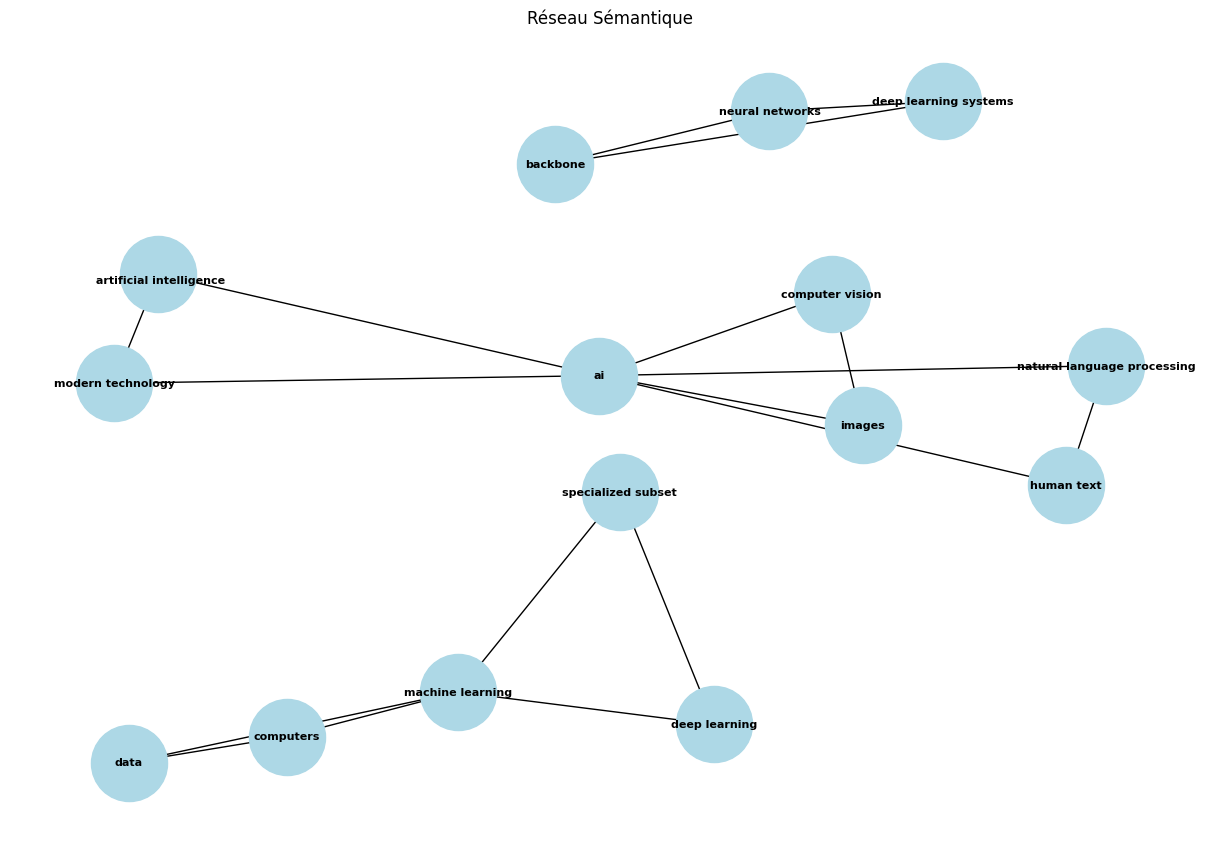


Analyse du réseau:
Nombre de nœuds: 15
Nombre de relations: 18

Concepts les plus centraux:
ai: 0.429
machine learning: 0.286

 artificial intelligence: 0.143


In [49]:
# 2 importation des bibliothèques nécessaires
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Question 3: Chargement du modèle de langage
nlp = spacy.load("en_core_web_sm")

# Texte d'exemple plus riche pour une meilleure démonstration
text = """
Artificial Intelligence (AI) is transforming modern technology.
Machine Learning algorithms enable computers to learn from data.
Deep Learning is a specialized subset of Machine Learning.
Neural Networks form the backbone of Deep Learning systems.
Natural Language Processing helps AI understand human text.
Computer Vision allows AI to interpret and analyze images.
"""

# Traitement du texte avec spaCy
doc = nlp(text)

# Question 4: Extraction des entités et création des relations
def extract_entities_and_relations(doc):
    """
    Extrait les entités et leurs relations à partir du document spaCy.
    Utilise les chunks nominaux et les dépendances syntaxiques.
    """
    entities = []
    relations = []
    
    for sentence in doc.sents:
        # Extraction des chunks nominaux significatifs
        ents_in_sentence = []
        for chunk in sentence.noun_chunks:
            # Nettoyage et normalisation du texte
            clean_text = ' '.join(token.text.lower() for token in chunk 
                                if not token.is_stop and not token.is_punct)
            if clean_text:
                ents_in_sentence.append(clean_text)
        
        # Ajout des entités
        entities.extend(ents_in_sentence)
        
        # Création des relations par co-occurrence
        for ent1, ent2 in combinations(ents_in_sentence, 2):
            relations.append((ent1, ent2))
    
    return list(set(entities)), list(set(relations))

# Question 5: Création du graphe sémantique
def create_semantic_network(entities, relations):
    """
    Crée un graphe NetworkX à partir des entités et relations.
    """
    G = nx.Graph()
    G.add_nodes_from(entities)
    G.add_edges_from(relations)
    return G

# Question 6: Visualisation et analyse du réseau
def visualize_and_analyze_network(G):
    """
    Visualise le graphe et calcule des métriques importantes.
    """
    # Configuration de la visualisation
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Dessin du graphe
    nx.draw(G, pos, 
           node_color='lightblue',
           node_size=3000,
           font_size=8,
           font_weight='bold',
           with_labels=True)
    
    plt.title("Réseau Sémantique")
    plt.show()
    
    # Analyse des métriques
    print("\nAnalyse du réseau:")
    print(f"Nombre de nœuds: {G.number_of_nodes()}")
    print(f"Nombre de relations: {G.number_of_edges()}")
    
    # Calcul de la centralité
    centrality = nx.degree_centrality(G)
    print("\nConcepts les plus centraux:")
    for node, score in sorted(centrality.items(), 
                            key=lambda x: x[1], 
                            reverse=True)[:3]:
        print(f"{node}: {score:.3f}")

# Exécution principale
entities, relations = extract_entities_and_relations(doc)
G = create_semantic_network(entities, relations)
visualize_and_analyze_network(G)

 <h3 style="color:#219ebc;"> 2ème Partie : Exploitation avancée du réseau </h3> 

C:\Users\naji\AppData\Local\Temp\ipykernel_23356\2214840795.py:44: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = token1.similarity(token2)


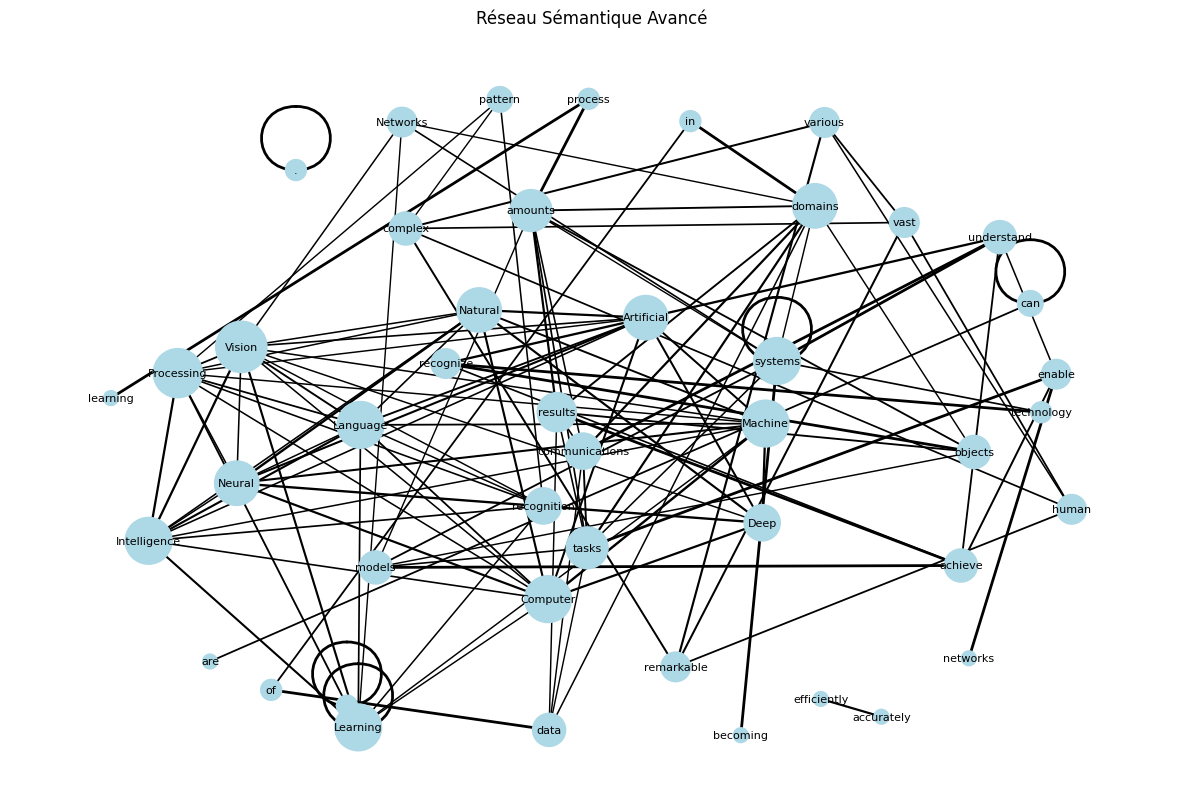


Analyse du réseau avancé:
Nombre de nœuds: 45
Nombre de relations: 121

Nœuds les plus centraux (degré):
Vision: 0.273
Processing: 0.250
systems: 0.227

Nœuds les plus centraux (betweenness):
Networks: 0.381
Vision: 0.227
domains: 0.216


In [50]:
# Exploitation avancée avec plus de fonctionnalités
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
import numpy as np

# Chargement du modèle
nlp = spacy.load("en_core_web_sm")

class AdvancedSemanticNetwork:
    """
    Classe pour créer et analyser un réseau sémantique avancé.
    Inclut la détection de relations syntaxiques et l'analyse de communautés.
    """
    
    def __init__(self):
        self.G = nx.Graph()
        self.entity_vectors = {}
        self.relation_types = defaultdict(list)
    
    def extract_syntactic_relations(self, doc):
        """
        Question 2: Extraction des relations syntaxiques entre les mots.
        """
        relations = []
        for token in doc:
            if token.dep_ in ['nsubj', 'dobj', 'pobj']:
                head = token.head.text.lower()
                dependent = token.text.lower()
                relation_type = token.dep_
                relations.append((head, dependent, relation_type))
        return relations
    
    def calculate_semantic_similarity(self, doc):
        """
        Question 3: Calcul de la similarité sémantique entre concepts.
        """
        similarities = {}
        for token1 in doc:
            for token2 in doc:
                if token1.has_vector and token2.has_vector and token1 != token2:
                    similarity = token1.similarity(token2)
                    if similarity > 0.5:  # Seuil de similarité
                        similarities[(token1.text, token2.text)] = similarity
        return similarities

    def process_text(self, text):
        """
        Traitement principal du texte avec analyse avancée.
        """
        doc = nlp(text)
        
        # Extraction des relations syntaxiques
        syntactic_relations = self.extract_syntactic_relations(doc)
        
        # Calcul des similarités
        similarities = self.calculate_semantic_similarity(doc)
        
        # Construction du graphe
        for head, dependent, rel_type in syntactic_relations:
            self.G.add_edge(head, dependent, 
                           relation_type=rel_type, 
                           weight=1.0)
            
        for (word1, word2), similarity in similarities.items():
            if self.G.has_edge(word1, word2):
                self.G[word1][word2]['weight'] = max(similarity, 
                                                   self.G[word1][word2]['weight'])
            else:
                self.G.add_edge(word1, word2, weight=similarity)

    def visualize_interactive(self):
        """
        Question 4: Visualisation interactive du réseau.
        """
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(self.G, k=1.5, iterations=50)
        
        # Dessin des nœuds avec taille basée sur la centralité
        centrality = nx.degree_centrality(self.G)
        node_sizes = [centrality[node] * 5000 for node in self.G.nodes()]
        
        nx.draw_networkx_nodes(self.G, pos, 
                             node_size=node_sizes,
                             node_color='lightblue')
        
        # Dessin des liens avec épaisseur basée sur le poids
        edge_weights = [self.G[u][v].get('weight', 1.0) 
                       for u, v in self.G.edges()]
        nx.draw_networkx_edges(self.G, pos, 
                             width=[w * 2 for w in edge_weights])
        
        # Ajout des labels
        nx.draw_networkx_labels(self.G, pos, font_size=8)
        
        plt.title("Réseau Sémantique Avancé")
        plt.axis('off')
        plt.show()
    
    def analyze_network(self):
        """
        Analyse approfondie du réseau.
        """
        print("\nAnalyse du réseau avancé:")
        print(f"Nombre de nœuds: {self.G.number_of_nodes()}")
        print(f"Nombre de relations: {self.G.number_of_edges()}")
        
        # Analyse de centralité
        degree_cent = nx.degree_centrality(self.G)
        betweenness_cent = nx.betweenness_centrality(self.G)
        
        print("\nNœuds les plus centraux (degré):")
        for node, score in sorted(degree_cent.items(), 
                                key=lambda x: x[1], 
                                reverse=True)[:3]:
            print(f"{node}: {score:.3f}")
            
        print("\nNœuds les plus centraux (betweenness):")
        for node, score in sorted(betweenness_cent.items(), 
                                key=lambda x: x[1], 
                                reverse=True)[:3]:
            print(f"{node}: {score:.3f}")

# Test du réseau avancé
text = """
Artificial Intelligence systems are becoming increasingly sophisticated.
Machine Learning algorithms process vast amounts of data efficiently.
Neural Networks enable complex pattern recognition tasks.
Deep Learning models achieve remarkable results in various domains.
Natural Language Processing systems can understand human communications.
Computer Vision technology can recognize objects and faces accurately.
"""

# Création et utilisation du réseau avancé
network = AdvancedSemanticNetwork()
network.process_text(text)
network.visualize_interactive()
network.analyze_network()

In [ ]:
%python -m spacy download en_core_web_lg

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).
